In [3]:
from langchain_community.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

persist_directory = "./chroma_db"

embeddings = HuggingFaceEmbeddings(model_name = 'BAAI/bge-large-en')
chroma = Chroma(persist_directory=persist_directory,
                embedding_function=embeddings)
retriever = chroma.as_retriever()   

C:\Users\ARL\AppData\Local\Temp\ipykernel_29988\1487695385.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name = 'BAAI/bge-large-en')
c:\Users\ARL\OneDrive\Documents\NL\GEN\codecorr\code_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ARL\AppData\Local\Temp\ipykernel_29988\1487695385.py:7: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the 

In [4]:
from langgraph.types import interrupt,Command
from langgraph.checkpoint.memory import InMemorySaver

In [5]:
retriever.get_relevant_documents("List all the issues with my JPA entity mapping", k=1)

C:\Users\ARL\AppData\Local\Temp\ipykernel_29988\1263932853.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents("List all the issues with my JPA entity mapping", k=1)


[Document(metadata={'urls': 'http://www.javaworld.com/javaworld/jw-11-2001/jw-1130-jsp.html, https://javapapers.com/jsp/explain-the-scope-of-jsp-objects/', 'id': '7146'}, page_content='<table width="100%" border="1">\n  <tr>\n      <td align="center">\n          <a>\n              <bean:message bundle="application" key="app.login"/>\n              <html:text property="login"></html:text>    \n          </a>\n      </td>\n  </tr>\n  <tr>\n      <td align="center">\n      <a>\n         <bean:message bundle="application" key="app.password"/>\n          <html:text property="password"></html:text>    \n      </a>\n      </td>\n      </tr>\n      <tr align="middle">\n          <td align="right">\n              <html:submit>connexion</html:submit>\n          </td>\n    </tr>\n  </table>  \n</html:form>\n</body>\n</html:html>\n<%@ page language="java" import="java.util.*" pageEncoding="ISO-8859-1"%>\n<%\nString path = request.getContextPath();')]

In [29]:
mydocs = chroma.similarity_search_with_score("why we need to have less number of constructors", k=1)
relevant_docs = []
for doc in mydocs:
    relevant_docs.append(doc[0].page_content)
print(relevant_docs)
    

['Number of Constructors\nClasses should have less than X Constructors.\nThe threshold is a parameter and can be changed at will.\nAvoid large Classes - too many Constructors (JEE)\nThis report lists all the Classes having more than X Constructors.\nIt provides the following information:\n - Class full name\n - Number of Constructors\nA class contains an unnecessarily large number of constructors. This issue makes it more difficult to understand and maintain the software, which indirectly affects security by making it more difficult or time-consuming to find and/or fix vulnerabilities. It also might make it easier to introduce vulnerabilities.\nReview the Class design to reduce the number of Constructors\nNumber of Java classes']


In [6]:
import os
from dotenv import load_dotenv

load_dotenv()

LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_TRACING_V2 = os.getenv("LANGCHAIN_TRACING_V2")
LANGCHAIN_ENDPOINT = os.getenv("LANGCHAIN_ENDPOINT")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
gemini_api_key = os.getenv("gemini_api_key")
groq_api_key = os.getenv("groq_api_key")
model_id = 'llama-3.1-8b-instant'#Gemma2-9b-It'
groq_api_key = "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"

In [7]:
from langchain.prompts import PromptTemplate
prompt_RAG = """
    You are an expert Java code reviewer and developer. I will provide you with a Java coding scenario, including a potential issue and relevant context. Your task is to:

1.  Analyze the provided scenario and identify the coding style problem.
2.  Generate syntactically correct and improved Java code that addresses the issue.
3.  Provide a clear and concise explanation of the problem and how your solution corrects it, referencing the provided context.

Scenario:
{question}

Chat history
{chat_history}

Context:
{context}

{human_input}
Please provide the corrected code and a detailed explanation.
    """

prompt = PromptTemplate(
    input_variables=["question", "chat_history", "context","human_input"],
    template=prompt_RAG
)

from langchain.chains import ConversationalRetrievalChain,ConversationChain,LLMChain
from langchain.memory import ConversationBufferWindowMemory
from langchain_groq import ChatGroq
# from config import *
# from prompts import prompt
# from vectorstore import retriever

model = ChatGroq(api_key=groq_api_key,
                 model=model_id,
                 max_tokens=1024,
                 )
chat_memory = ConversationBufferWindowMemory(
    input_key="human_input",
    memory_key="chat_history",
    return_messages=False,
    max_tokens=1024,
    k=5,  # Number of past interactions to keep in memory
)

model_chain = LLMChain(
    llm=model,
    memory=chat_memory,
    prompt=prompt,
    verbose=True
)
q1 = "List all the issues with my JPA entity mapping"
model_chain.invoke({
    "human_input": "",
    "question": "What is issue in having more number of constructors?", 
    "context": "Issues with JPA entity mapping include improper use of annotations, lack of default constructors, and incorrect data types."
    })

C:\Users\ARL\AppData\Local\Temp\ipykernel_29988\2451788625.py:38: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  chat_memory = ConversationBufferWindowMemory(
C:\Users\ARL\AppData\Local\Temp\ipykernel_29988\2451788625.py:46: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  model_chain = LLMChain(




> Entering new LLMChain chain...
Prompt after formatting:

    You are an expert Java code reviewer and developer. I will provide you with a Java coding scenario, including a potential issue and relevant context. Your task is to:

1.  Analyze the provided scenario and identify the coding style problem.
2.  Generate syntactically correct and improved Java code that addresses the issue.
3.  Provide a clear and concise explanation of the problem and how your solution corrects it, referencing the provided context.

Scenario:
What is issue in having more number of constructors?

Chat history


Context:
Issues with JPA entity mapping include improper use of annotations, lack of default constructors, and incorrect data types.


Please provide the corrected code and a detailed explanation.
    

> Finished chain.


{'human_input': '',
 'question': 'What is issue in having more number of constructors?',
 'context': 'Issues with JPA entity mapping include improper use of annotations, lack of default constructors, and incorrect data types.',
 'chat_history': '',
 'text': '**Problem Identification:**\n\nThe issue with having more number of constructors in a Java class is not directly related to the provided context about JPA entity mapping. However, in the context of Java development and best practices, having multiple constructors in a class can lead to a few issues:\n\n1.  **Code Duplication**: Multiple constructors can lead to code duplication, making it harder to maintain and update the code.\n\n2.  **Complexity**: More constructors can increase the complexity of the class, making it harder to understand and use.\n\n3.  **Testing**: Multiple constructors can make it harder to write unit tests, as you\'ll need to consider all possible constructor scenarios.\n\n**Corrected Code:**\n\nLet\'s assume 

In [35]:
context = "/n/n".join(relevant_docs)
print(context)

Number of Constructors
Classes should have less than X Constructors.
The threshold is a parameter and can be changed at will.
Avoid large Classes - too many Constructors (JEE)
This report lists all the Classes having more than X Constructors.
It provides the following information:
 - Class full name
 - Number of Constructors
A class contains an unnecessarily large number of constructors. This issue makes it more difficult to understand and maintain the software, which indirectly affects security by making it more difficult or time-consuming to find and/or fix vulnerabilities. It also might make it easier to introduce vulnerabilities.
Review the Class design to reduce the number of Constructors
Number of Java classes


In [8]:
# q1 = "List all the issues with my JPA entity mapping"
# model_chain.predict({
#     "question": "What is issue in having more number of constructors?", 
#     "context": context
#     })

In [9]:
from langchain_community.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

persist_directory = "./chroma_db_sql"


sql_chroma = Chroma(persist_directory=persist_directory,
                embedding_function=embeddings)
sql_retriever = sql_chroma.as_retriever()   

In [10]:
sql_chat_memory = ConversationBufferWindowMemory(
    memory_key="chat_history",
    return_messages=True,
    max_tokens=1024,
    k=5,  # Number of past interactions to keep in memory
)

sql_model_chain = ConversationalRetrievalChain.from_llm(
    llm=model,
    memory=chat_memory,
    combine_docs_chain_kwargs={"prompt": prompt},
    retriever=sql_retriever
)

In [87]:
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel, Field
from typing import Any, Dict, List, Optional, Union

class MessageState(BaseModel):
    question: str = Field(..., description="The user's question or prompt")
    answer: Optional[str] = Field(None, description="The model's answer to the question")
    context: Optional[List[str]] = Field(None, description="Contextual information retrieved from the vector store")
    application: Optional[str] = Field(None, description="which application query belongs to")
    query_type: Optional[str] = Field(None, description="Wether it is asking for summary or asking a particular issue")
    summary: Optional[str] = Field(None,description="summerise the answer")
    query_type_score: Optional[float] = Field(None, description="Confidence score for query type classification")
    query_language: Optional[str] = Field(None, description="The programming language the query is about")
    query_language_score: Optional[float] = Field(None, description="Confidence score for query language classification")
    retry_count: int = 0
    max_retries: int = 3
    awaiting_clarify: bool = False
    clarify_prompt: Optional[str] = Field(None, description="Prompt to clarify user input if needed")
    top_score: Optional[float] = Field(None, description="Top score from retrieved documents")
    retrieved_docs: Optional[List[Dict[str, Any]]] = Field(None, description="Documents retrieved from the vector store")
    history: Optional[List[Dict[str, str]]] = Field([], description="Conversation history")
    


In [58]:
resp = model.invoke("who is sharukha?")
print(resp.content)

You're likely referring to Shah Rukh Khan, a renowned Indian film actor, producer, and television personality. He is often referred to as the "King of Bollywood" due to his immense popularity and success in the Indian film industry.

Born on November 2, 1965, in New Delhi, India, Shah Rukh Khan has been active in the film industry since the late 1980s. He has appeared in over 80 films, including romantic comedies, dramas, and action movies.

Some of his most notable films include:

1. "Dilwale Dulhania Le Jayenge" (1995) - a romantic drama that became one of the longest-running films in Indian cinema history.
2. "Kuch Kuch Hota Hai" (1998) - a romantic comedy that cemented his status as a leading man in Bollywood.
3. "Devdas" (2002) - a romantic drama that showcased his acting range.
4. "Chak De India" (2007) - a sports drama that earned him critical acclaim.
5. "My Name Is Khan" (2010) - a drama that tackled issues of racism and prejudice.

Shah Rukh Khan has won numerous awards for h

In [100]:
from langchain.chains import LLMChain
from langchain_core.output_parsers import PydanticOutputParser

from langchain.schema import SystemMessage, HumanMessage, AIMessage

SYSTEM_PROMPT = (
    "Be concise and include examples when helpful."
)

def build_messages_from_history(state):
    """
    Convert state.history into a list of langchain message objects.
    Expects state.history to be a list of dicts: {"role": "user"|"assistant", "content": "..."}
    """
    messages = [SystemMessage(content=SYSTEM_PROMPT)]

    # include prior turns
    for turn in state.history:
        role = turn.get("role")
        content = turn.get("content", "")
        if role == "user":
            messages.append(HumanMessage(content=content))
        elif role == "assistant":
            messages.append(AIMessage(content=content))
        # optionally ignore system or other roles

    # append the current user question as the latest human message
    # Be careful not to duplicate: if you already appended the current question to history
    # earlier, skip this append. Here we assume you haven't appended yet.
    messages.append(HumanMessage(content=state.question))
    return messages

def fallback_node(state: MessageState) -> MessageState:
    # ensure current user message is recorded once in history (avoid double append)
    if not state.history or state.history[-1].get("content") != state.question:
        state.history.append({"role":"user","content": state.question})

    messages = build_messages_from_history(state)

    # call the ChatGroq model with the conversation messages
    response = model.invoke(messages)  # returns an AIMessage-like object
    state.answer = response.content

    # append assistant reply to history
    state.history.append({"role":"assistant","content": state.answer})
    return state


def get_request_language(state: MessageState) -> MessageState:
    """
    Determine the programming language of the request based on the user's question.
    """

    print("get request language ....."+str(state))
    print("2...........")
    parser = PydanticOutputParser(pydantic_object=MessageState)
    format_instructions = parser.get_format_instructions()
    print("Format instructions:"+str(format_instructions))
    prompt = """
    Classify the following question as either "JPA" if it is asking about Java code, "SQL" if it is asking about SQL code, or "unknown" if it is not clear.
    Also provide a confidence score between 0 and 1 for your classification.

    Please follow the JSON instructions exactly:
    Question: "{question}"

    {format_instructions}
    """
    prompt_template = PromptTemplate(
        input_variables=["question"],
        template=prompt,
        partial_variables={"format_instructions": format_instructions}
    )
    # Simulate LLM response
    model.temperature = 0
    model.max_tokens = 800
    llm_chain = LLMChain(llm=model, prompt=prompt_template, 
                    output_parser=parser)
    response = llm_chain.invoke({"question": 
                                 state.question})
    state.query_type = response['text'].query_type
    state.query_type_score = response['text'].query_type_score
    state.query_language = response['text'].query_language
    state.query_language_score = response['text'].query_language_score
    print("Determined query language:", state.query_language, "with score:", state.query_language_score)
    return state

def clarify_query_language(state: MessageState) -> MessageState:
    """
    Clarify the query language if it is uncertain.
    """
    state.awaiting_clarify = True

    clarify_prompt = ("I couldn't determine whether your question is JPA or SQ. Could you please clarify?"
                      "Respond with following options:"
                      """- JPA
- SQL""")
    state.clarify_prompt = clarify_prompt
    # payload = {
    #     "prompt":clarify_prompt,
    #     "retry_count": state.retry_count,
    #     "max_retries": state.max_retries
    # }
    # print("Asking user for clarification:", clarify_prompt)
    raw = input("User response: ")
    # refined = interrupt(payload)
    # print(refined)
    # raw = refined.payload.get("user_response","")
    if state.retry_count >= state.max_retries:
        print("Maximum retries reached. Proceeding without clarification.")
        state.query_language = "unknown"
        state.awaiting_clarify = False
        return state
    user_response = raw.strip().lower()
    if user_response == "jpa":
        state.query_language = "JPA"
    elif user_response == "sql":
        state.query_language = "SQL"
    else:
        print("I did not understand your response. Please try again.")
        if state.retry_count < state.max_retries:
            state.retry_count += 1
            state = clarify_query_language(state)
    state.awaiting_clarify = False
    return state
    


In [71]:
from langchain.chains import LLMChain
from langchain_core.output_parsers import PydanticOutputParser
def get_request_type(state: MessageState) -> MessageState:
    """
    Determine the programming language of the request based on the user's question.
    """

    print("get request type ....."+str(state))
    parser = PydanticOutputParser(pydantic_object=MessageState)
    format_instructions = parser.get_format_instructions()
    print("Format instructions:"+str(format_instructions))
    prompt = """
    Classify the following question as either "Summary" if it is asking about Summary, "Individual Issue" if it is asking about a specific issue, or "unknown" if it is not clear.
    Also provide a confidence score between 0 and 1 for your classification.
    Question: "{question}"
    Follow the JSON instructions exactly:
    {format_instructions}
    """
    prompt_template = PromptTemplate(
        input_variables=["question"],
        template=prompt,
        partial_variables={"format_instructions": format_instructions}
    )
    # Simulate LLM response
    llm_chain = LLMChain(llm=model, prompt=prompt_template, 
                    output_parser=parser)
    print("get request type 2"+str(state))
    response = llm_chain.invoke({"question": state.question})
    state.query_type = response['text'].query_type
    state.query_type_score = response['text'].query_type_score
    state.query_language = response['text'].query_language
    state.query_language_score = response['text'].query_language_score
    print("get request type final"+str(state))
    return state

def clarify_query_type(state: MessageState) -> MessageState:
    """
    Clarify the query language if it is uncertain.
    """
    print("clarify_query_type"+str(state))
    state.awaiting_clarify = True

    clarify_prompt = ("I couldn't determine whether your question is asking for a summary or a specific issue. Could you please clarify?"
                      "Respond with following options:"
                      """- Summary
- Individual Issue""")
    state.clarify_prompt = clarify_prompt
    print("Asking user for clarification:", clarify_prompt)
    raw = input("User response: ")
    # payload = {
    #     "prompt":clarify_prompt,
    #     "retry_count": state.retry_count,
    #     "max_retries": state.max_retries
    # }
    # refined = interrupt(payload)
    # print(refined)
    # raw = refined.payload.get("user_response","")
    if state.retry_count >= state.max_retries:
        print("Maximum retries reached. Exiting clarification.")
        state.awaiting_clarify = False
        state.query_type = "Unknown"
        return state
    user_response = raw.strip().lower()
    if user_response == "summary":
        state.query_type = "Summary"
    elif user_response == "individual issue":
        state.query_type = "Individual Issue"
    else:
        print("I did not understand your response. Please try again.")
        if state.retry_count < state.max_retries:
            state.retry_count += 1
            state = clarify_query_type(state)
    state.awaiting_clarify = False
    return state
    


In [ ]:
def route_query_node(state: MessageState) -> MessageState:
    if state.query_type_score is None or state.query_type_score < 0.7:
        return "clarify_query_type"
    if state.query_type_score is None or state.query_type_score >= 0.7:
        return "get_request_language"
    if state.awaiting_clarify:
        return "awaiting"
    else:
        return "fallback_node"

def route_language_node(state: MessageState) -> MessageState:
    if state.query_language_score is None or state.query_language_score < 0.7:
        return "clarify_query_language"
    if state.query_language_score is None or state.query_language_score >= 0.7:
        return "score_check_node"
    if state.awaiting_clarify:
        return "awaiting"
    else:
        return "fallback_node"

In [15]:
from langchain.chains import LLMChain
from langchain_core.output_parsers import PydanticOutputParser

# class RouterOutput(BaseModel):
#     application: str
#     query_type: str

router_prompt = """You are an expert router that can route the query to the correct application based on the question. You are supposed to do 2 types of classification.
1. Classify the application the query belongs to. The applications are:
- JPA
- SQL
2. Classify the type of query. The types are:
- Summary
- Individual Issue

Question: {question}

{format_instructions}
"""
prompt_router= PromptTemplate(template=router_prompt, 
                              input_variables = ["question"],
                              partial_variables={ "format_instructions": PydanticOutputParser(pydantic_object=MessageState).get_format_instructions()}
                              )

# model_with_structed_output = model.with_structured_output(RouterOutput)

router_chain = LLMChain(llm=model, prompt=prompt_router,output_parser=PydanticOutputParser(pydantic_object=MessageState))


In [16]:
def router_node(state: MessageState) -> MessageState:
    print(" Router Node "+str(state))
    response = router_chain.invoke({"question": state.question})
    print(f"Router Response: {response}")
    application = response['text'].application
    query_type = response['text'].query_type
    state.application = application
    state.query_type = query_type
    print(f"Routed to {application} and {query_type}")
    return state

def jpa_node(state: MessageState) -> MessageState:
    print("jpa_node "+str(state))
    relevant_docs = []
    for doc in state.retrieved_docs:
        relevant_docs.append(doc['content'])
    print(relevant_docs)
    response = model_chain.invoke({"question": state.question, 
                                   "context": "/n/n".join(relevant_docs),"human_input":""})
    print("Response from model_chain:"+str(response))
    state.answer = response['text']
    print(f"JPA Node Response: {state.answer}")
    return state
def sql_node(state: MessageState) -> MessageState:
    print("sql_node "+str(state))
    response = sql_model_chain.invoke({"question": state.question})
    state.answer = response['answer']
    print(f"SQL Node Response: {state.answer}")
    return state


In [73]:
def route_rag_score_node(state: MessageState) -> MessageState:
    if state.top_score >= 0.3:
        return state.query_language
    else:
        return "clarify"


def jpa_query_retriever(question: str, k: int = 5):
    print(f"Querying retriever with question: {question}")
    docs = chroma.similarity_search_with_score(question, k=k)
    print(f"Total documents retrieved: {len(docs)}")
    # print(docs)
    scored_docs = [{"content": doc.page_content, "score": score} for doc, score in docs[:k]]
    print(f"Retrieved {len(scored_docs)} documents for question: {question}")
    for doc in scored_docs:
        print(f"Document score: {doc['score']:.3f}")
        print(doc['content'])
    return scored_docs

def sql_query_retriever(question: str, k: int = 5):
    print(f"Querying retriever with question: {question}")
    docs = sql_chroma.similarity_search_with_score(question, k=k)
    print(f"Total documents retrieved: {len(docs)}")
    # print(docs)
    scored_docs = [{"content": doc.page_content, "score": score} for doc, score in docs[:k]]
    print(f"Retrieved {len(scored_docs)} documents for question: {question}")
    for doc in scored_docs:
        print(f"Document score: {doc['score']:.3f}")
        print(doc['content'])
    return scored_docs

def score_check_node(state: MessageState):
    print("score_check_node "+str(state))
    if state.query_language == "JPA":
        docs = jpa_query_retriever(state.question, k=5)
    elif state.query_language == "SQL":
        docs = jpa_query_retriever(state.question, k=5)
    else:
        docs = sql_query_retriever(state.question, k=5)
    state.retrieved_docs = docs
    state.top_score = docs[0]["score"] if docs else 0.0
    print(f"[score_check_node] question='{state.question}' top_score={state.top_score:.3f} retry={state.retry_count}")
    # thresholds
    return state

def clarify_node(state: MessageState):
    # If we're already awaiting clarify, nothing to do (frontend will prompt)
    if state.awaiting_clarify:
        return state
    # Build a short clarifying prompt
    state.clarify_prompt = (
        "I couldn't find a strong match in the knowledge base. "
        "Please rephrase your question or add details (error message, exact operation, versions).\n\n"
        "Examples:\n"
        " - 'Hibernate save() NullPointerException when entity is detached'\n"
        " - 'MySQL syntax error near ...'\n\n"
        "Please type your refined query:"
    )
    state.awaiting_clarify = True
    if state.retry_count >= state.max_retries:
        state.answer = "Maximum clarification attempts reached. Please try again later."
        state.awaiting_clarify = False
        return state
    print("[clarify_node] asking user for clarification (awaiting_clarify=True)"+str(state.clarify_prompt))
    raw = input("User response: ")
    # payload = {
    #     "prompt":state.clarify_prompt,
    #     "retry_count": state.retry_count,
    #     "max_retries": state.max_retries
    # }
    # refined = interrupt(payload)
    # print(refined)
    # raw = refined.payload.get("user_response","")
    user_response = raw.strip().lower()
    if user_response:
        state.question = user_response
        state.awaiting_clarify = False
        state.retry_count += 1
    return state

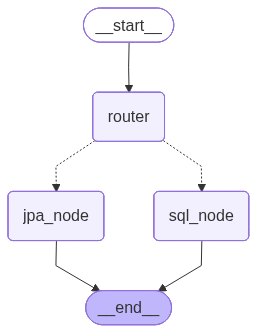

In [ ]:
# #V1
# graph = StateGraph(MessageState)
# graph.add_node("router", router_node)
# graph.add_node("jpa_node", jpa_node)
# graph.add_node("sql_node", sql_node)

# graph.add_edge(START,"router")
# graph.add_conditional_edges("router",
#                             lambda state: "jpa_node" if state.application.lower() == "jpa" else "sql_node",
#                             {

#                                 "jpa_node": "jpa_node",
#                                 "sql_node": "sql_node"
#                             }
                            
#                             )

# graph.add_edge("jpa_node", END)
# graph.add_edge("sql_node", END)
# graph.compile()

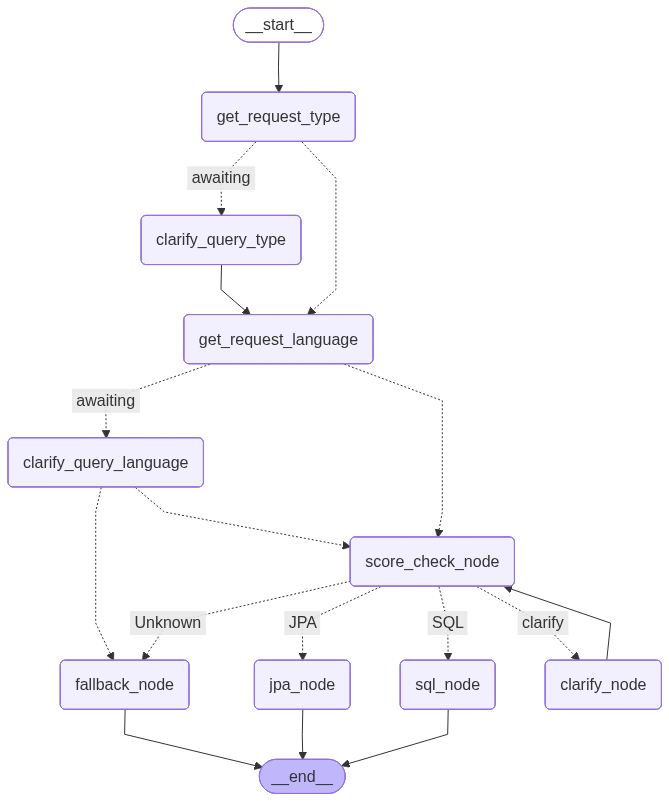

In [101]:
#V2

#V2

graph = StateGraph(MessageState)

graph.add_node("get_request_type", get_request_type)

graph.add_node("clarify_query_type", clarify_query_type)

graph.add_node("clarify_query_language", clarify_query_language)

graph.add_node("get_request_language", get_request_language)

graph.add_node("jpa_node", jpa_node)
graph.add_node("fallback_node", fallback_node)

graph.add_node("sql_node", sql_node)
graph.add_node("score_check_node", score_check_node)
graph.add_node("clarify_node", clarify_node)



graph.add_edge(START,"get_request_type")

graph.add_conditional_edges(

"get_request_type",

route_query_node,

{



"clarify_query_type": "clarify_query_type",

"get_request_language": "get_request_language",

"awaiting": "clarify_query_type"

}

)

graph.add_edge(

"clarify_query_type",

"get_request_language"

)

graph.add_conditional_edges(

"get_request_language",

route_language_node,

{



"clarify_query_language": "clarify_query_language",

"awaiting": "clarify_query_language",

"score_check_node": "score_check_node",

}

)

graph.add_conditional_edges(
"clarify_query_language",
lambda state: "fallback_node" if state.query_language.lower() == "unknown" else "score_check_node",
{
"fallback_node": "fallback_node",
"score_check_node": "score_check_node",
}
)
graph.add_conditional_edges(
"score_check_node",
route_rag_score_node,
{
"JPA": "jpa_node",
"SQL": "sql_node",
"clarify": "clarify_node",
"Unknown": "fallback_node",
}
)
graph.add_edge("clarify_node", "score_check_node")

graph.add_edge("jpa_node", END)

graph.add_edge("sql_node", END)
graph.add_edge("fallback_node", END)

graph.compile()



In [106]:
# Compile the graph
config = {"configurable":{"thread_id":"2"}}
app = graph.compile(checkpointer=InMemorySaver())

# Call with initial state (MessageState)
q1 = "Summarize all issues related to SQL joins"
q2 = "What is issue in having more number of constructors"
q3 = "List common problems in my JPA code"
q4 = "Avoid using the GROUP BY clause"
result = app.invoke({"question": "q4"},config=config)

print("Final state:", result)
print("Answer:", result.get("answer"))
print("Application:", result.get("application"))
print("Query Type:", result.get("query_type"))

get request type .....question='q4' answer=None context=None application=None query_type=None summary=None query_type_score=None query_language=None query_language_score=None retry_count=0 max_retries=3 awaiting_clarify=False clarify_prompt=None top_score=None retrieved_docs=None
Format instructions:The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"question": {"description": "The user's question or prompt", "title": "Question", "type": "string"}, "answer": {"anyOf": [{"type": "string"}, {"type": "null"}], "default": null, "description": "The model's answer to the question", "

In [55]:
# model_chain.invoke({"question": "What is issue in having more number of constructors?"})

In [65]:
# app.get_state(config)

In [107]:

app.invoke({"question": "what was previous question?"}, config=config)

get request type .....question='what was previous question?' answer='**Problem Identification:**\n\nThe provided code has several issues related to Java best practices and security:\n\n1.  **String Concatenation in Loops**: The code uses string concatenation in loops, which can lead to performance issues and is not recommended.\n2.  **Use of `java.io` Package**: The code uses the `java.io` package, which is not allowed in Enterprise JavaBeans (EJB) applications.\n3.  **Use of `File` Object**: The code uses the `File` object, which can lead to security vulnerabilities if not used properly.\n4.  **Lack of Resource Bundle**: The code does not use a resource bundle, which is recommended for internationalization and localization.\n\n**Corrected Code:**\n\nTo address these issues, we can modify the code as follows:\n\n```java\n// Use a StringBuilder instead of concatenating strings in a loop\npublic class Sample1 {\n    public static void main(String[] args) {\n        StringBuilder result =

{'question': 'what was previous question?',
 'answer': 'There is no previous question. This conversation just started.',
 'query_type': None,
 'query_type_score': None,
 'query_language': 'unknown',
 'query_language_score': 0.0,
 'retry_count': 3,
 'max_retries': 3,
 'awaiting_clarify': False,
 'clarify_prompt': "I couldn't determine whether your question is JPA or SQ. Could you please clarify?Respond with following options:- JPA\n- SQL",
 'top_score': 0.45233139395713806,
 'retrieved_docs': [{'content': '<table width="100%" border="1">\n  <tr>\n      <td align="center">\n          <a>\n              <bean:message bundle="application" key="app.login"/>\n              <html:text property="login"></html:text>    \n          </a>\n      </td>\n  </tr>\n  <tr>\n      <td align="center">\n      <a>\n         <bean:message bundle="application" key="app.password"/>\n          <html:text property="password"></html:text>    \n      </a>\n      </td>\n      </tr>\n      <tr align="middle">\n    

In [98]:
# app.get_state(config)

In [ ]:
question = "List previous questions?"
app.update_state(config,{"question":question} )
# app.update_state(config,{"history":question} )
# app.update_state(,config)
app.invoke(app.get_state(config),config=config)

get request type .....question='what was previous question?' answer='Shah Rukh Khan, often referred to as SRK, is a renowned Indian film actor, producer, and television personality. He is widely regarded as one of the most successful and influential actors in the history of Indian cinema.\n\nBorn on November 2, 1965, in New Delhi, India, Shah Rukh Khan began his acting career in the late 1980s with small roles in television shows and films. However, it was his breakthrough role in the 1992 film "Deewana" that catapulted him to stardom.\n\nThroughout his career, Shah Rukh Khan has appeared in over 80 films, including some of the most iconic and beloved Bollywood movies such as:\n\n1. "Dilwale Dulhania Le Jayenge" (1995)\n2. "Kuch Kuch Hota Hai" (1998)\n3. "Dil To Pagal Hai" (1997)\n4. "Kabhi Khushi Kabhie Gham" (2001)\n5. "Chak De India" (2007)\n6. "My Name Is Khan" (2010)\n7. "Chennai Express" (2013)\n8. "Dilwale" (2015)\n9. "Raees" (2017)\n10. "Zero" (2018)\n\nShah Rukh Khan has won n

{'question': 'what was previous question?',
 'answer': "This is the beginning of our conversation, so there is no previous question. What would you like to talk about? I can help with any questions or topics you'd like to discuss.",
 'query_type': None,
 'query_type_score': None,
 'query_language': 'unknown',
 'query_language_score': 0.0,
 'retry_count': 3,
 'max_retries': 3,
 'awaiting_clarify': False,
 'clarify_prompt': "I couldn't determine whether your question is JPA or SQ. Could you please clarify?Respond with following options:- JPA\n- SQL",
 'history': [{'role': 'user', 'content': 'who is sharukha?'},
  {'role': 'assistant',
   'content': 'You\'re likely referring to Shah Rukh Khan, a renowned Indian film actor, producer, and television personality. He is often referred to as the "King of Bollywood" due to his immense popularity and success in the Indian film industry.\n\nBorn on November 2, 1965, in New Delhi, India, Shah Rukh Khan has been active in the film industry since th